# Import the dependencies

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load data

In [2]:
data = pd.read_csv("src/train.csv")
data = data.drop("Id", axis=1)

data_test = pd.read_csv("src/test.csv")
data_test = data_test.drop("Id", axis=1)
data_test['SalePrice'] = pd.read_csv("src/sample_submission.csv")['SalePrice'].tolist()

# Preprocess data

In [39]:
print("Columns with null values in TRAIN data")

columns_with_null = data.columns[data.isna().any()].tolist()

for inx_, cwn_name in enumerate(columns_with_null):
    print(f"{inx_}) {data[cwn_name].isna().sum()} na in\t'{cwn_name}', col_type: {data[cwn_name].dtype}")

Columns with null values in TRAIN data
0) 259 na in	'LotFrontage', col_type: float64
1) 1369 na in	'Alley', col_type: object
2) 872 na in	'MasVnrType', col_type: object
3) 8 na in	'MasVnrArea', col_type: float64
4) 37 na in	'BsmtQual', col_type: object
5) 37 na in	'BsmtCond', col_type: object
6) 38 na in	'BsmtExposure', col_type: object
7) 37 na in	'BsmtFinType1', col_type: object
8) 38 na in	'BsmtFinType2', col_type: object
9) 1 na in	'Electrical', col_type: object
10) 690 na in	'FireplaceQu', col_type: object
11) 81 na in	'GarageType', col_type: object
12) 81 na in	'GarageYrBlt', col_type: float64
13) 81 na in	'GarageFinish', col_type: object
14) 81 na in	'GarageQual', col_type: object
15) 81 na in	'GarageCond', col_type: object
16) 1453 na in	'PoolQC', col_type: object
17) 1179 na in	'Fence', col_type: object
18) 1406 na in	'MiscFeature', col_type: object


In [40]:
print("Columns with null values in TEST data")

test_columns_with_null = data_test.columns[data_test.isna().any()].tolist()

for inx_, cwn_name in enumerate(test_columns_with_null):
    print(f"{inx_}) {data_test[cwn_name].isna().sum()} na in\t'{cwn_name}', col_type: {data_test[cwn_name].dtype}")

Columns with null values in TEST data
0) 4 na in	'MSZoning', col_type: object
1) 227 na in	'LotFrontage', col_type: float64
2) 1352 na in	'Alley', col_type: object
3) 2 na in	'Utilities', col_type: object
4) 1 na in	'Exterior1st', col_type: object
5) 1 na in	'Exterior2nd', col_type: object
6) 894 na in	'MasVnrType', col_type: object
7) 15 na in	'MasVnrArea', col_type: float64
8) 44 na in	'BsmtQual', col_type: object
9) 45 na in	'BsmtCond', col_type: object
10) 44 na in	'BsmtExposure', col_type: object
11) 42 na in	'BsmtFinType1', col_type: object
12) 1 na in	'BsmtFinSF1', col_type: float64
13) 42 na in	'BsmtFinType2', col_type: object
14) 1 na in	'BsmtFinSF2', col_type: float64
15) 1 na in	'BsmtUnfSF', col_type: float64
16) 1 na in	'TotalBsmtSF', col_type: float64
17) 2 na in	'BsmtFullBath', col_type: float64
18) 2 na in	'BsmtHalfBath', col_type: float64
19) 1 na in	'KitchenQual', col_type: object
20) 2 na in	'Functional', col_type: object
21) 730 na in	'FireplaceQu', col_type: object


In [48]:
print("Columns with null values which appear ONLY in TEST data")

test_columns_with_null = data_test.columns[data_test.isna().any()].tolist()

for inx_, cwn_name in enumerate(set(test_columns_with_null).symmetric_difference(set(columns_with_null))):
    print(f"{inx_}) {data_test[cwn_name].isna().sum()} na in\t'{cwn_name}', col_type: {data_test[cwn_name].dtype}")

Columns with null values which appear ONLY in TEST data
0) 1 na in	'Exterior2nd', col_type: object
1) 2 na in	'BsmtHalfBath', col_type: float64
2) 1 na in	'SaleType', col_type: object
3) 1 na in	'TotalBsmtSF', col_type: float64
4) 1 na in	'KitchenQual', col_type: object
5) 2 na in	'Functional', col_type: object
6) 1 na in	'GarageArea', col_type: float64
7) 2 na in	'Utilities', col_type: object
8) 0 na in	'Electrical', col_type: object
9) 1 na in	'GarageCars', col_type: float64
10) 1 na in	'Exterior1st', col_type: object
11) 2 na in	'BsmtFullBath', col_type: float64
12) 4 na in	'MSZoning', col_type: object
13) 1 na in	'BsmtFinSF1', col_type: float64
14) 1 na in	'BsmtFinSF2', col_type: float64
15) 1 na in	'BsmtUnfSF', col_type: float64


In [45]:
print("Columns with null values in TEST & TRAIN data")

for inx_, cwn_name in enumerate(set(test_columns_with_null).intersection(set(columns_with_null))):
    print(f"{inx_}) {data[cwn_name].isna().sum()} na in train, {data_test[cwn_name].isna().sum()} in test \t'{cwn_name}', col_type: {data_test[cwn_name].dtype}")

Columns with null values in TEST & TRAIN data
0) 259 na in train, 227 in test 	'LotFrontage', col_type: float64
1) 38 na in train, 42 in test 	'BsmtFinType2', col_type: object
2) 872 na in train, 894 in test 	'MasVnrType', col_type: object
3) 81 na in train, 78 in test 	'GarageFinish', col_type: object
4) 690 na in train, 730 in test 	'FireplaceQu', col_type: object
5) 1369 na in train, 1352 in test 	'Alley', col_type: object
6) 37 na in train, 42 in test 	'BsmtFinType1', col_type: object
7) 81 na in train, 78 in test 	'GarageCond', col_type: object
8) 1179 na in train, 1169 in test 	'Fence', col_type: object
9) 38 na in train, 44 in test 	'BsmtExposure', col_type: object
10) 1453 na in train, 1456 in test 	'PoolQC', col_type: object
11) 81 na in train, 78 in test 	'GarageQual', col_type: object
12) 1406 na in train, 1408 in test 	'MiscFeature', col_type: object
13) 37 na in train, 44 in test 	'BsmtQual', col_type: object
14) 37 na in train, 45 in test 	'BsmtCond', col_type: object
15)

# Fill null / NA records based on type of record

In [64]:
# fill TEST & TRAIN datasets with the same fields
fdata = data.copy(deep=True)
fdata_test = data_test.copy(deep=True)

for cwn_name in set(test_columns_with_null).intersection(set(columns_with_null)):
    if fdata[cwn_name].dtype != "object":
        fdata_test[cwn_name] = fdata_test[cwn_name].fillna(fdata[cwn_name].mean())
        fdata[cwn_name] = fdata[cwn_name].fillna(fdata[cwn_name].mean())
    else:
        fdata_test[cwn_name] = fdata_test[cwn_name].fillna(fdata[cwn_name].mode()[0])
        fdata[cwn_name] = fdata[cwn_name].fillna(fdata[cwn_name].mode()[0])

In [66]:
print("Columns with null values in TEST & TRAIN FULL data")

for inx_, cwn_name in enumerate(set(test_columns_with_null).intersection(set(columns_with_null))):
    print(f"{inx_}) {fdata[cwn_name].isna().sum()} na in train, {fdata_test[cwn_name].isna().sum()} in test \t'{cwn_name}', col_type: {fdata_test[cwn_name].dtype}")

Columns with null values in TEST & TRAIN data
0) 0 na in train, 0 in test 	'LotFrontage', col_type: float64
1) 0 na in train, 0 in test 	'BsmtFinType2', col_type: object
2) 0 na in train, 0 in test 	'MasVnrType', col_type: object
3) 0 na in train, 0 in test 	'GarageFinish', col_type: object
4) 0 na in train, 0 in test 	'FireplaceQu', col_type: object
5) 0 na in train, 0 in test 	'Alley', col_type: object
6) 0 na in train, 0 in test 	'BsmtFinType1', col_type: object
7) 0 na in train, 0 in test 	'GarageCond', col_type: object
8) 0 na in train, 0 in test 	'Fence', col_type: object
9) 0 na in train, 0 in test 	'BsmtExposure', col_type: object
10) 0 na in train, 0 in test 	'PoolQC', col_type: object
11) 0 na in train, 0 in test 	'GarageQual', col_type: object
12) 0 na in train, 0 in test 	'MiscFeature', col_type: object
13) 0 na in train, 0 in test 	'BsmtQual', col_type: object
14) 0 na in train, 0 in test 	'BsmtCond', col_type: object
15) 0 na in train, 0 in test 	'GarageType', col_type: o

In [67]:
# fill TEST & TRAIN datasets with the UNIQUE fields for TEST DATA

for cwn_name in set(set(test_columns_with_null).symmetric_difference(set(columns_with_null))):
    if fdata[cwn_name].dtype != "object":
        fdata_test[cwn_name] = fdata_test[cwn_name].fillna(fdata[cwn_name].mean())
    else:
        fdata_test[cwn_name] = fdata_test[cwn_name].fillna(fdata[cwn_name].mode()[0])

In [68]:
print("Columns with null values which appear ONLY in FULL TEST data")

test_columns_with_null = data_test.columns[data_test.isna().any()].tolist()

for inx_, cwn_name in enumerate(set(test_columns_with_null).symmetric_difference(set(columns_with_null))):
    print(f"{inx_}) {fdata_test[cwn_name].isna().sum()} na in\t'{cwn_name}', col_type: {fdata_test[cwn_name].dtype}")

Columns with null values which appear ONLY in FULL TEST data
0) 0 na in	'Exterior2nd', col_type: object
1) 0 na in	'BsmtHalfBath', col_type: float64
2) 0 na in	'SaleType', col_type: object
3) 0 na in	'TotalBsmtSF', col_type: float64
4) 0 na in	'KitchenQual', col_type: object
5) 0 na in	'Functional', col_type: object
6) 0 na in	'GarageArea', col_type: float64
7) 0 na in	'Utilities', col_type: object
8) 0 na in	'Electrical', col_type: object
9) 0 na in	'GarageCars', col_type: float64
10) 0 na in	'Exterior1st', col_type: object
11) 0 na in	'BsmtFullBath', col_type: float64
12) 0 na in	'MSZoning', col_type: object
13) 0 na in	'BsmtFinSF1', col_type: float64
14) 0 na in	'BsmtFinSF2', col_type: float64
15) 0 na in	'BsmtUnfSF', col_type: float64


### Define a pipeline for processing data

In [69]:
def preprocess_data(df_data: pd.DataFrame, preproc_obj=None):
    df_data = df_data.copy(deep=True)

    train_preprocessors = preproc_obj is None

    # Encoding Categorical Features
    if train_preprocessors:
        preproc_obj=dict()
        preproc_obj["ss"] = dict()
        preproc_obj["le"] = dict()
        preproc_obj["mms"] = dict()

    for col_name_ in df_data.columns:
        df_data[col_name_] = df_data[col_name_].fillna(0).tolist()

    for key_ in data.keys():
        if data[key_].dtypes == "object":
            if train_preprocessors:
                preproc_obj["le"][key_] = LabelEncoder()
                preproc_obj["le"][key_].fit(df_data[key_].to_list())
            try:
                df_data[key_] = preproc_obj["le"][key_].transform(df_data[key_].to_list())
            except Exception as eeee:
                print(key_)
                raise eeee
        else:
            df_data[key_] = df_data[key_]

    if train_preprocessors:
        df_data.drop(df_data.index[-1], inplace=True)

    # Take log of the Target output
    df_data["SalePrice"] = np.log(df_data["SalePrice"])

    list_keep_data = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition', ]
    list_ss_data = ['MSSubClass', 'LotFrontage', 'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'YrSold', ]
    list_log_data = ['LotArea', '1stFlrSF', 'GrLivArea', ]

    for col_name_ in list_log_data:
        df_data[col_name_] = np.log(df_data[col_name_])

    for col_name_ in list_ss_data:
        if train_preprocessors:
            preproc_obj["ss"][col_name_] = StandardScaler()
            preproc_obj["ss"][col_name_].fit(np.array(df_data[col_name_]).reshape(-1, 1))
        df_data[col_name_] = preproc_obj["ss"][col_name_].transform(np.array(df_data[col_name_]).reshape(-1, 1))

    for col_name_ in df_data.columns:
        if col_name_ == 'SalePrice':
            continue
        if train_preprocessors:
            preproc_obj["mms"][col_name_] = MinMaxScaler(feature_range=(-1, 1))
            preproc_obj["mms"][col_name_].fit(np.array(df_data[col_name_]).reshape(-1, 1))
        df_data[col_name_] = preproc_obj["mms"][col_name_].transform(np.array(df_data[col_name_]).reshape(-1, 1))

    return df_data, preproc_obj

In [70]:
data_num_train, preprocessing_obj = preprocess_data(fdata)

In [71]:
len(data_test)

1459

In [72]:
data_num_test, _ = preprocess_data(fdata_test, preprocessing_obj)

In [73]:
rcParams['figure.figsize'] = 10, 12


def draw_pred_lines(y_pred, y_real):
    drawing_df = pd.DataFrame({"Pred": y_pred, "Real": y_real})
    drawing_df = drawing_df.sort_values("Real").reset_index(drop=True)

    for key_, val_ in drawing_df.items():
        plt.plot(range(len(val_)), val_, label=key_)

    plt.xlabel("No")
    plt.ylabel("Step Time")
    plt.title("Pred vs Real Step Time")
    plt.legend()
    plt.show()


def draw_few_lines(lines_dict: dict, range_draw=None, x_label="x", y_label="y", title="f(x)"):
    for key_, val_ in lines_dict.items():
        plt.plot(range(len(val_)) if not range_draw else range_draw, val_, label=key_)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

# 1. Tune Linear Regression model

0.015659308415117076


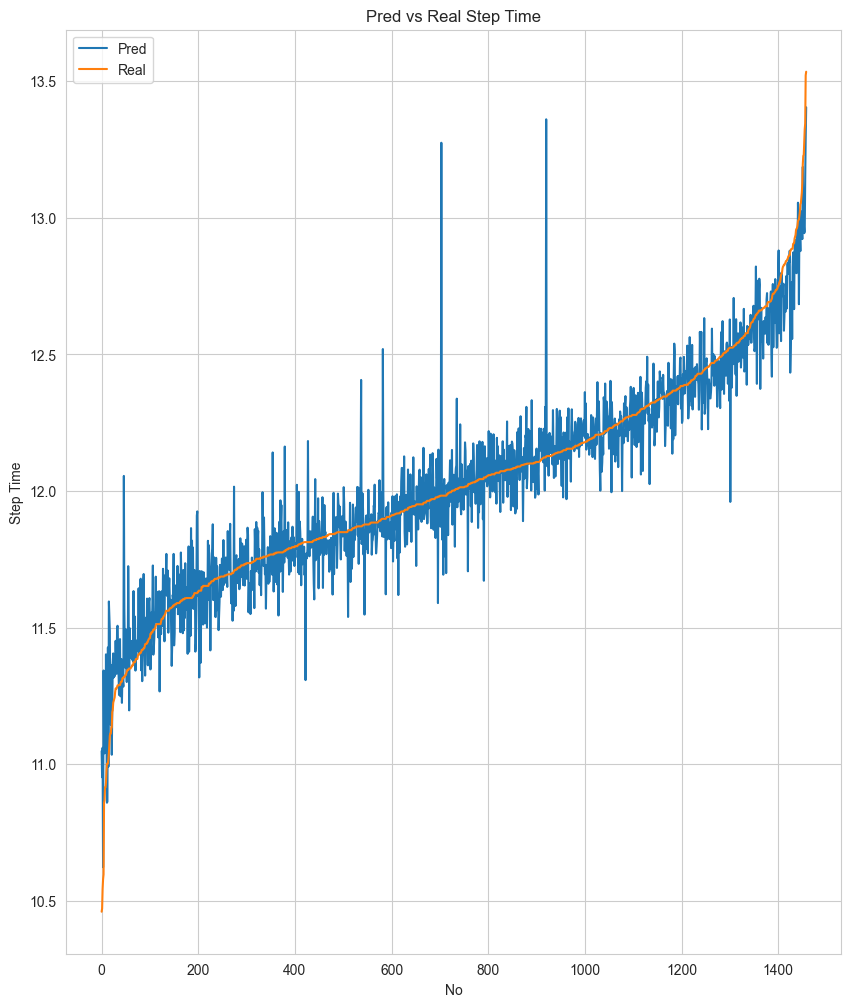

In [74]:
linear_regressor = LinearRegression(fit_intercept=False)
linear_regressor.fit(data_num_train.drop('SalePrice', axis=1), data_num_train['SalePrice'])

train_pred = linear_regressor.predict(data_num_train.drop('SalePrice', axis=1))
rme_train = mean_squared_error(data_num_train['SalePrice'], train_pred)
print(rme_train)

draw_pred_lines(train_pred, data_num_train['SalePrice'].to_list())

0.14180109717277128


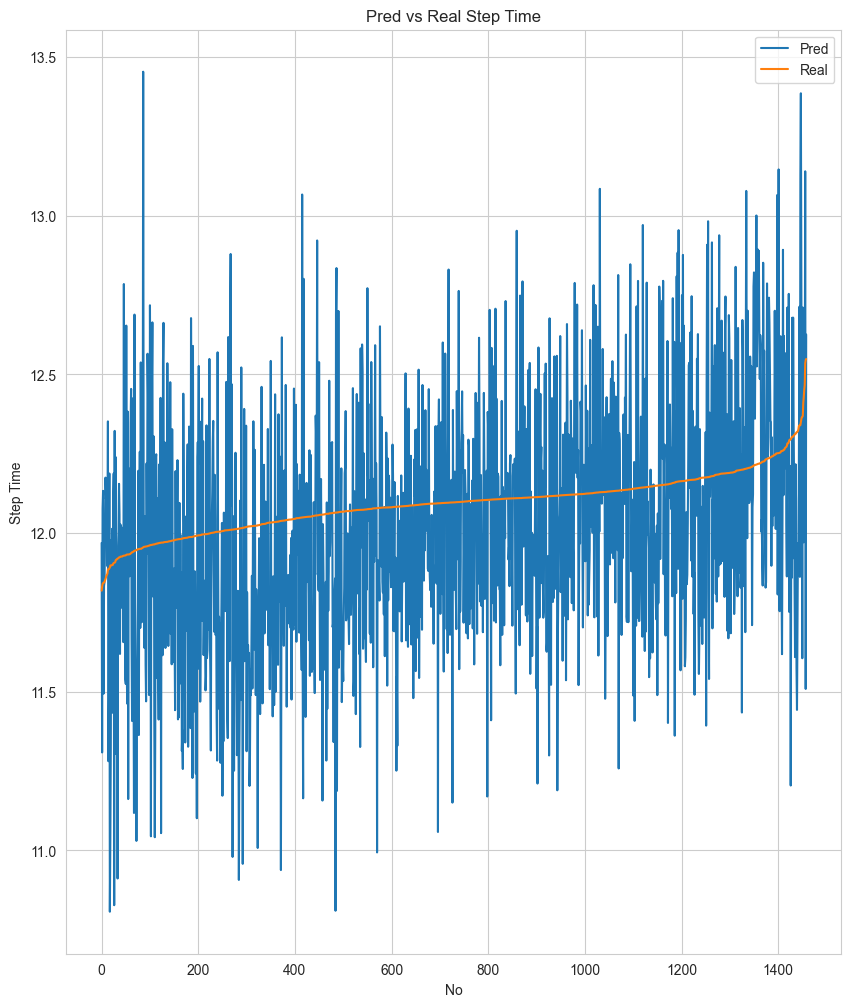

In [75]:
test_pred = linear_regressor.predict(data_num_test.drop('SalePrice', axis=1))
rme_test = mean_squared_error(data_num_test['SalePrice'], test_pred)
print(rme_test)

draw_pred_lines(test_pred, data_num_test['SalePrice'].to_list())

# 2. Decision Tree model

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

MSE=0.0, R2_score=1.0


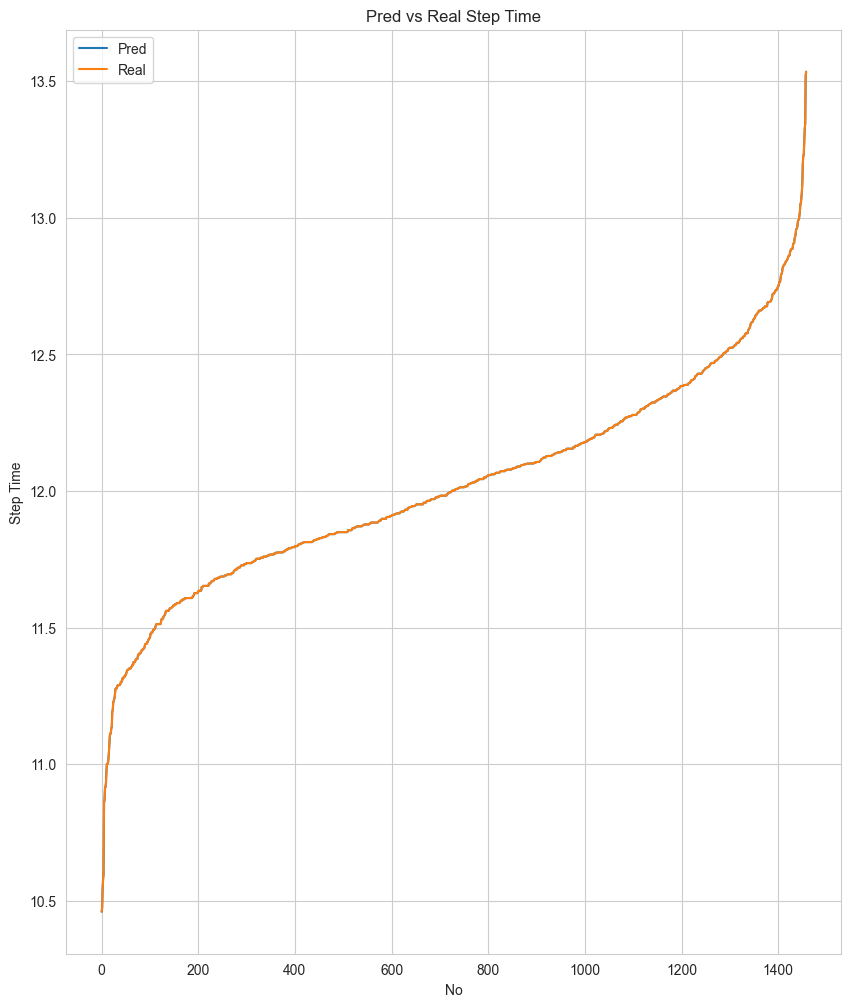

In [77]:
dt_model = DecisionTreeRegressor()
dt_model.fit(data_num_train.drop('SalePrice', axis=1), data_num_train['SalePrice'])

train_pred = dt_model.predict(data_num_train.drop('SalePrice', axis=1))
mse_train = mean_squared_error(data_num_train['SalePrice'], train_pred, squared=False)
r2_score_train = r2_score(data_num_train['SalePrice'], train_pred)
print(f"MSE={mse_train}, R2_score={r2_score_train}")

draw_pred_lines(train_pred, data_num_train['SalePrice'].to_list())

On test data:
MSE=0.1667515915090237, R2_score=-19.576552649873513


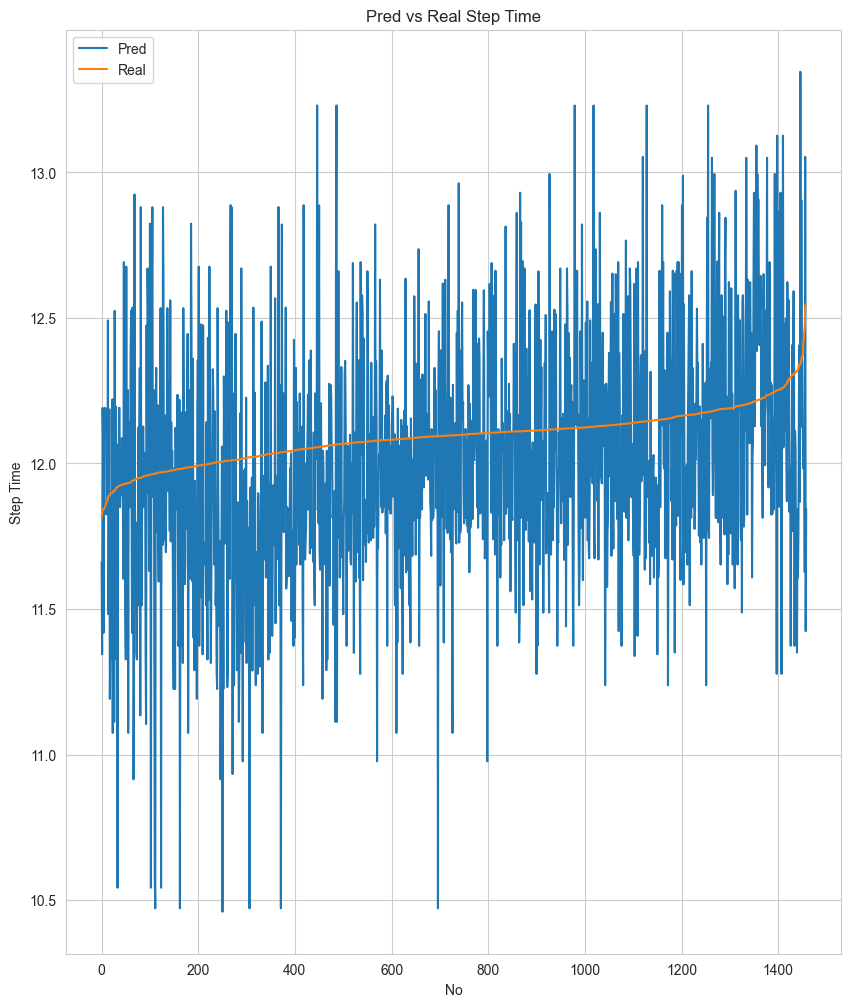

In [78]:
test_pred = dt_model.predict(data_num_test.drop('SalePrice', axis=1))
mse_test = mean_squared_error(data_num_test['SalePrice'], test_pred)
r2_score_test = r2_score(data_num_test['SalePrice'], test_pred)
print("On test data:")
print(f"MSE={mse_test}, R2_score={r2_score_test}")

draw_pred_lines(test_pred, data_num_test['SalePrice'].to_list())

# 3. Random Forest model

In [79]:
from sklearn.ensemble import RandomForestRegressor

MSE=0.05278283314506053, R2_score=0.982538382077274


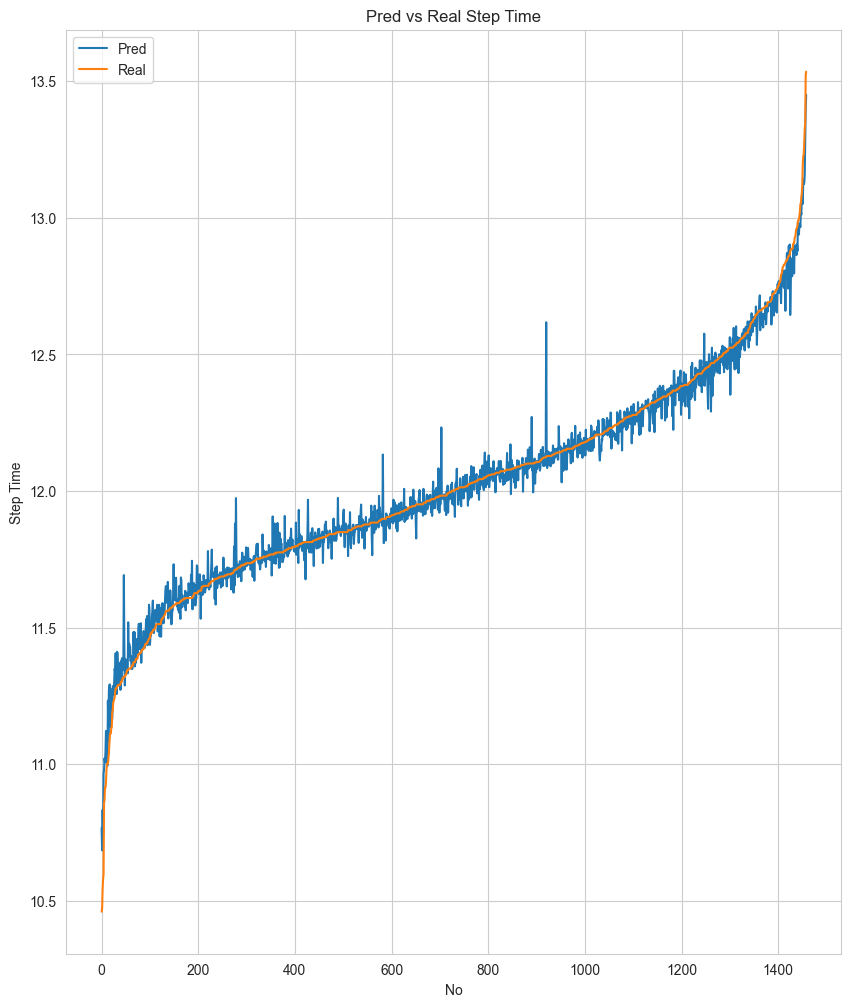

In [80]:
rf_model = RandomForestRegressor()
rf_model.fit(data_num_train.drop('SalePrice', axis=1), data_num_train['SalePrice'])

train_pred = rf_model.predict(data_num_train.drop('SalePrice', axis=1))
mse_train = mean_squared_error(data_num_train['SalePrice'], train_pred, squared=False)
r2_score_train = r2_score(data_num_train['SalePrice'], train_pred)
print(f"MSE={mse_train}, R2_score={r2_score_train}")

draw_pred_lines(train_pred, data_num_train['SalePrice'].to_list())

On test data:
MSE=0.1349862332145641, R2_score=-15.656820541333644


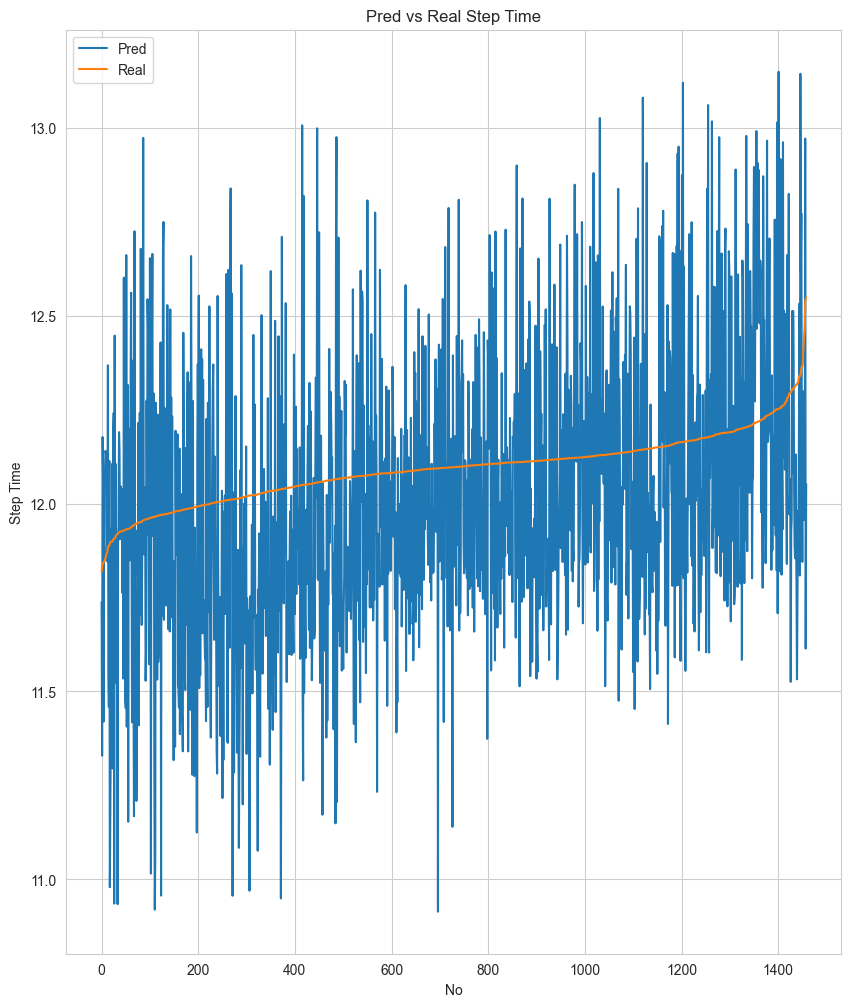

In [81]:
test_pred = rf_model.predict(data_num_test.drop('SalePrice', axis=1))
mse_test = mean_squared_error(data_num_test['SalePrice'], test_pred)
r2_score_test = r2_score(data_num_test['SalePrice'], test_pred)
print("On test data:")
print(f"MSE={mse_test}, R2_score={r2_score_test}")

draw_pred_lines(test_pred, data_num_test['SalePrice'].to_list())

# 4. Gradient Boosting Regression

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

MSE=0.010373354833354576, R2_score=0.9349842884486812


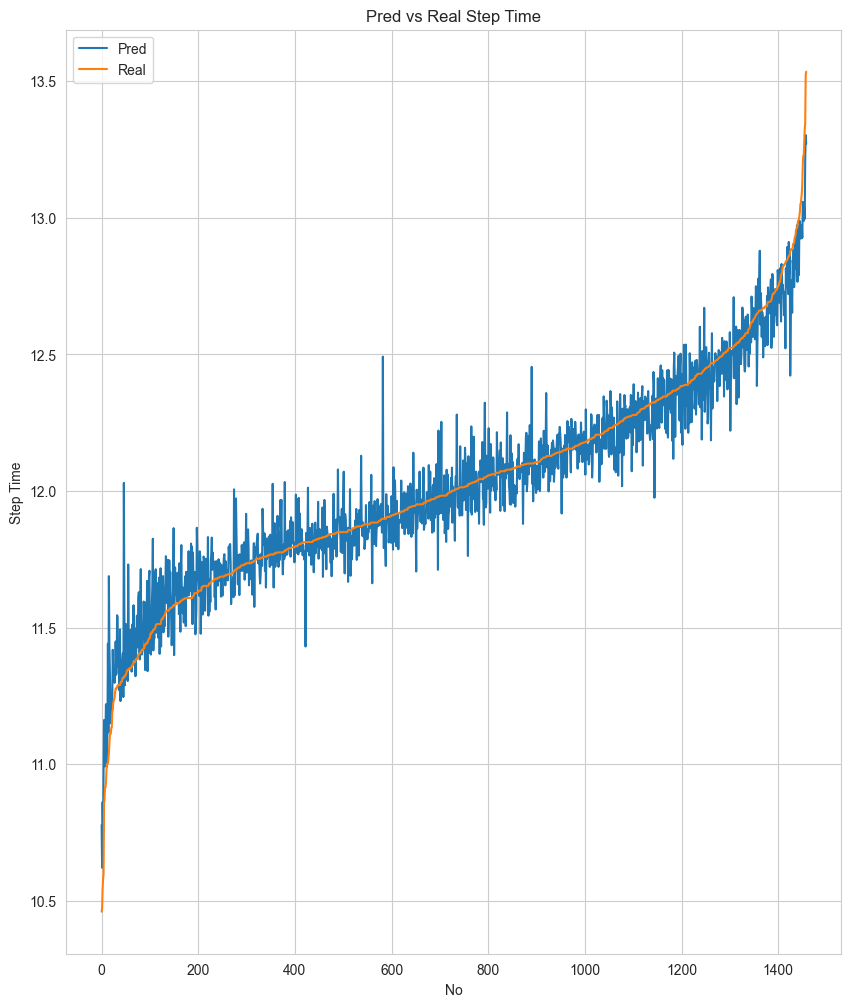

In [83]:
gbr_model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=0)

gbr_model.fit(data_num_train.drop('SalePrice', axis=1), data_num_train['SalePrice'])

train_pred = gbr_model.predict(data_num_train.drop('SalePrice', axis=1))
mse_train = mean_squared_error(data_num_train['SalePrice'], train_pred)
r2_score_train = r2_score(data_num_train['SalePrice'], train_pred)
print(f"MSE={mse_train}, R2_score={r2_score_train}")

draw_pred_lines(train_pred, data_num_train['SalePrice'].to_list())

On test data:
MSE=0.13546554290090068, R2_score=-15.715965649978472


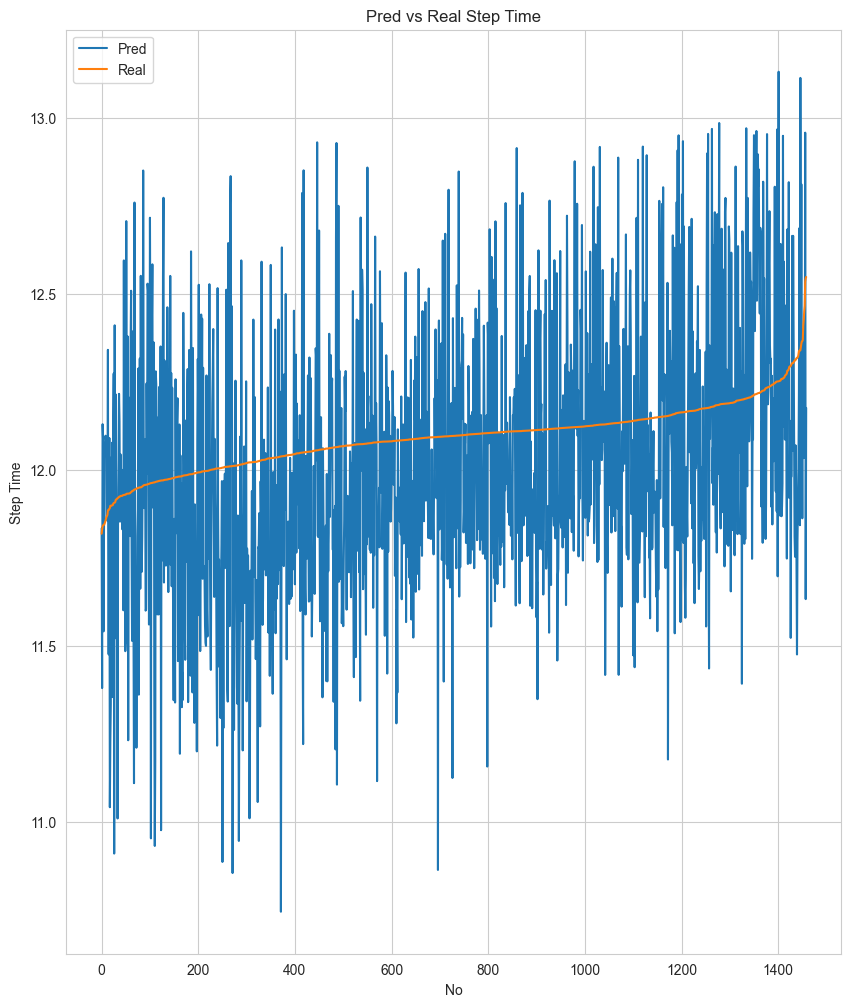

In [84]:
test_pred = gbr_model.predict(data_num_test.drop('SalePrice', axis=1))
mse_test = mean_squared_error(data_num_test['SalePrice'], test_pred)
r2_score_test = r2_score(data_num_test['SalePrice'], test_pred)
print("On test data:")
print(f"MSE={mse_test}, R2_score={r2_score_test}")

draw_pred_lines(test_pred, data_num_test['SalePrice'].to_list())

# ANN Regression

In [85]:
from keras import models
from keras import layers

In [86]:
model = models.Sequential()

model.add(layers.Dense(units=256, input_shape=(None, len(data_num_train.columns) - 1), activation='relu'))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Dense(units=1))

model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 256)         20480     
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 dense_1 (Dense)             (None, None, 256)         65792     
                                                                 
 dropout_1 (Dropout)         (None, None, 256)         0         
                                                                 
 dense_2 (Dense)             (None, None, 256)         65792     
                                                                 
 dropout_2 (Dropout)         (None, None, 256)         0         
                                                                 
 dense_3 (Dense)             (None, None, 1)           2

In [87]:
epochs = 1500
history = model.fit(x=data_num_train.drop("SalePrice", axis=1), y=data_num_train["SalePrice"], validation_data=(data_num_test.drop("SalePrice", axis=1), data_num_test["SalePrice"]), epochs=epochs, batch_size=128)

Epoch 1/1500
12/12 [==============================] - 1s 21ms/step - loss: 59.7356 - val_loss: 11.6102
Epoch 2/1500
12/12 [==============================] - 0s 6ms/step - loss: 8.7618 - val_loss: 5.3811
Epoch 3/1500
12/12 [==============================] - 0s 7ms/step - loss: 4.1022 - val_loss: 1.5523
Epoch 4/1500
12/12 [==============================] - 0s 7ms/step - loss: 3.0751 - val_loss: 0.4029
Epoch 5/1500
12/12 [==============================] - 0s 8ms/step - loss: 2.4894 - val_loss: 1.8271
Epoch 6/1500
12/12 [==============================] - 0s 7ms/step - loss: 2.1711 - val_loss: 1.2633
Epoch 7/1500
12/12 [==============================] - 0s 7ms/step - loss: 1.9595 - val_loss: 0.8157
Epoch 8/1500
12/12 [==============================] - 0s 7ms/step - loss: 1.8560 - val_loss: 0.8984
Epoch 9/1500
12/12 [==============================] - 0s 7ms/step - loss: 1.7867 - val_loss: 1.5713
Epoch 10/1500
12/12 [==============================] - 0s 8ms/step - loss: 1.6706 - val_loss: 0.7

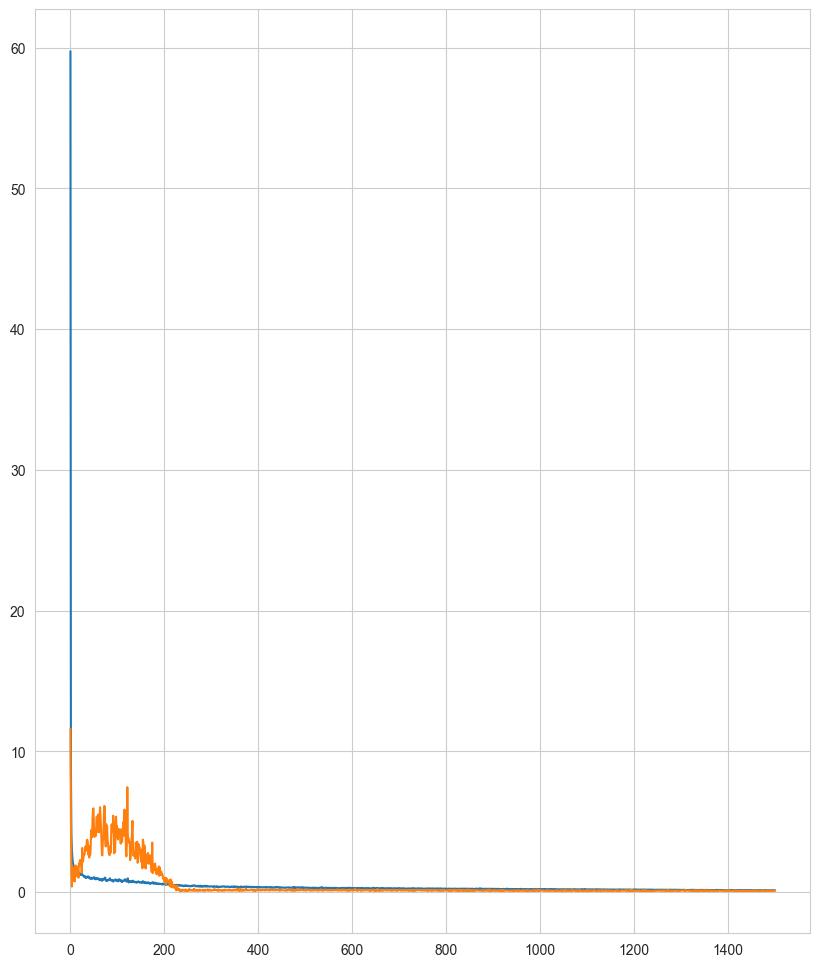

In [88]:
plt.plot(range(1, epochs + 1), history.history['loss'], label="loss")
plt.plot(range(1, epochs + 1), history.history['val_loss'], label="val_loss")
plt.show()

0.017974602181511642


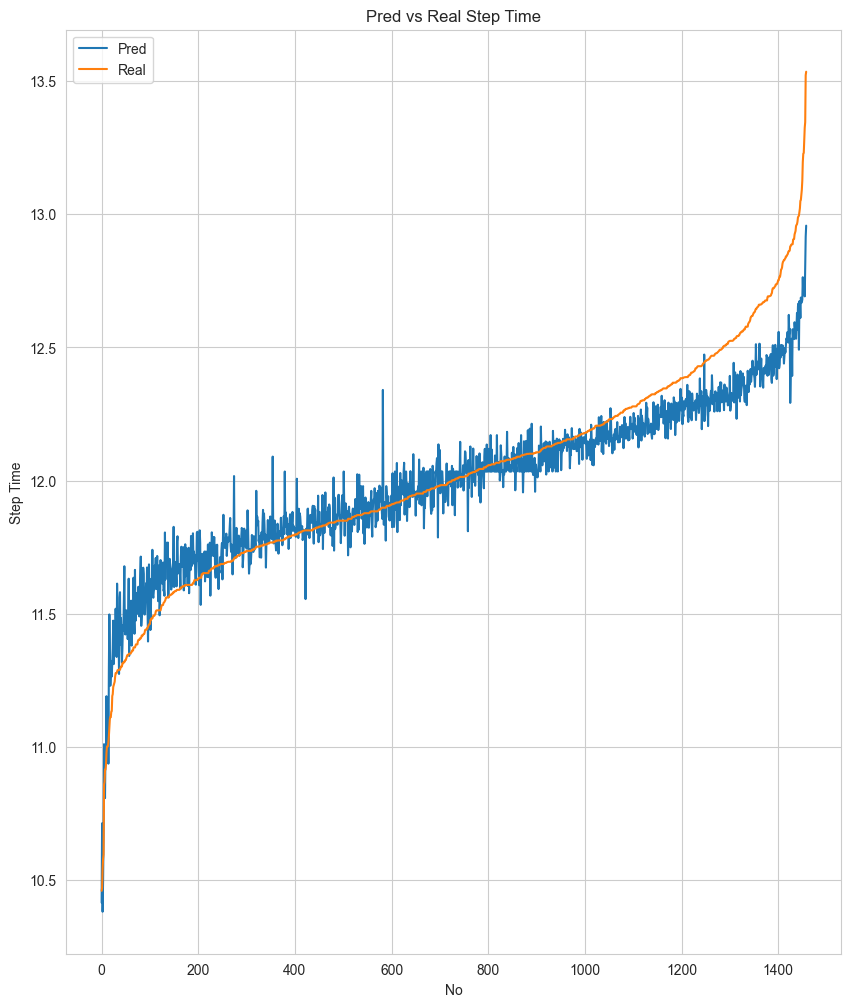

In [89]:
train_pred = model.predict(data_num_train.drop('SalePrice', axis=1), verbose=0)
rmse_train = mean_squared_error(data_num_train['SalePrice'], train_pred, )
print(rmse_train)

draw_pred_lines(list(train_pred), data_num_train['SalePrice'].to_list())

0.0978460715511211


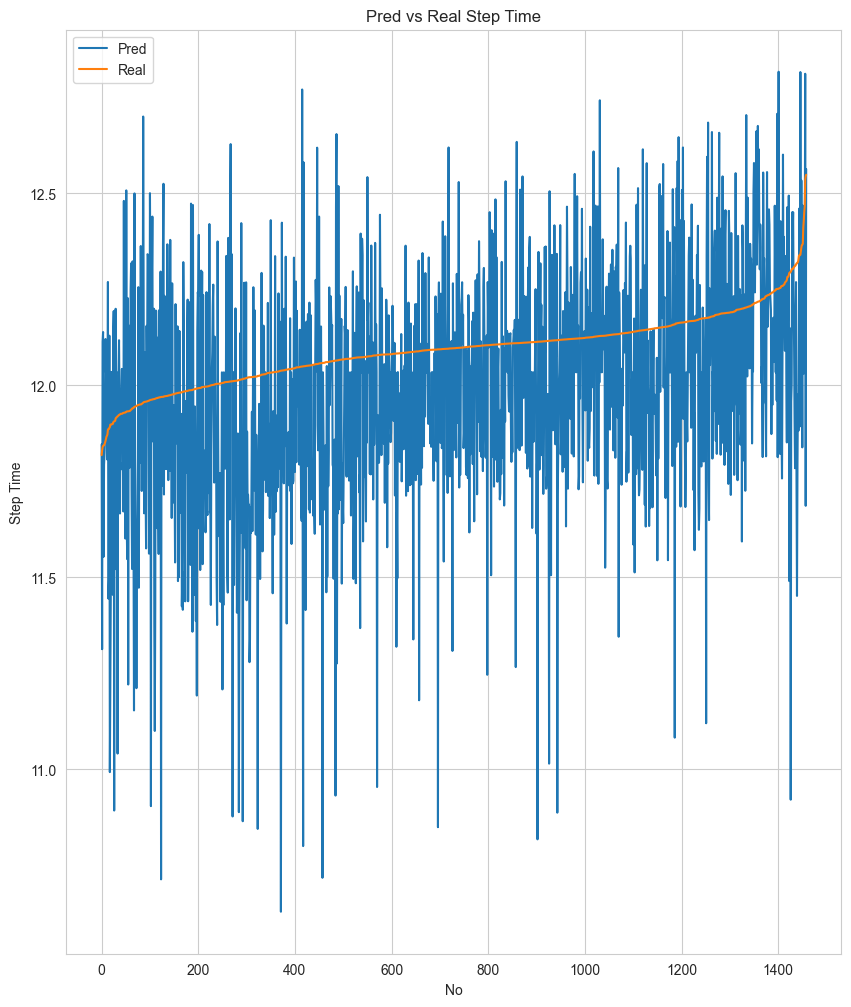

In [90]:
test_pred = model.predict(data_num_test.drop('SalePrice', axis=1), verbose=0)
rmse_test = mean_squared_error(data_num_test['SalePrice'], test_pred,)
print(rmse_test)

draw_pred_lines(list(test_pred), data_num_test['SalePrice'].to_list())

In [91]:
model = models.Sequential()

model.add(layers.Dense(units=512, input_shape=(None, len(data_num_train.columns) - 1), activation='relu'))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Dense(units=1))

model.compile(optimizer="adam", loss="mean_absolute_error")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, None, 512)         40960     
                                                                 
 dropout_3 (Dropout)         (None, None, 512)         0         
                                                                 
 dense_5 (Dense)             (None, None, 512)         262656    
                                                                 
 dropout_4 (Dropout)         (None, None, 512)         0         
                                                                 
 dense_6 (Dense)             (None, None, 512)         262656    
                                                                 
 dropout_5 (Dropout)         (None, None, 512)         0         
                                                                 
 dense_7 (Dense)             (None, None, 1)          

Epoch 1/1500
6/6 [==============================] - 2s 64ms/step - loss: 6.8993 - val_loss: 4.5474
Epoch 2/1500
6/6 [==============================] - 0s 31ms/step - loss: 2.8378 - val_loss: 3.2008
Epoch 3/1500
6/6 [==============================] - 0s 31ms/step - loss: 1.8572 - val_loss: 1.1517
Epoch 4/1500
6/6 [==============================] - 0s 27ms/step - loss: 1.3702 - val_loss: 1.0820
Epoch 5/1500
6/6 [==============================] - 0s 25ms/step - loss: 1.1395 - val_loss: 0.7591
Epoch 6/1500
6/6 [==============================] - 0s 25ms/step - loss: 1.0491 - val_loss: 0.4443
Epoch 7/1500
6/6 [==============================] - 0s 25ms/step - loss: 0.9938 - val_loss: 0.9925
Epoch 8/1500
6/6 [==============================] - 0s 24ms/step - loss: 0.9523 - val_loss: 0.7118
Epoch 9/1500
6/6 [==============================] - 0s 27ms/step - loss: 0.8805 - val_loss: 0.5077
Epoch 10/1500
6/6 [==============================] - 0s 28ms/step - loss: 0.9165 - val_loss: 0.4972
Epoch 11/

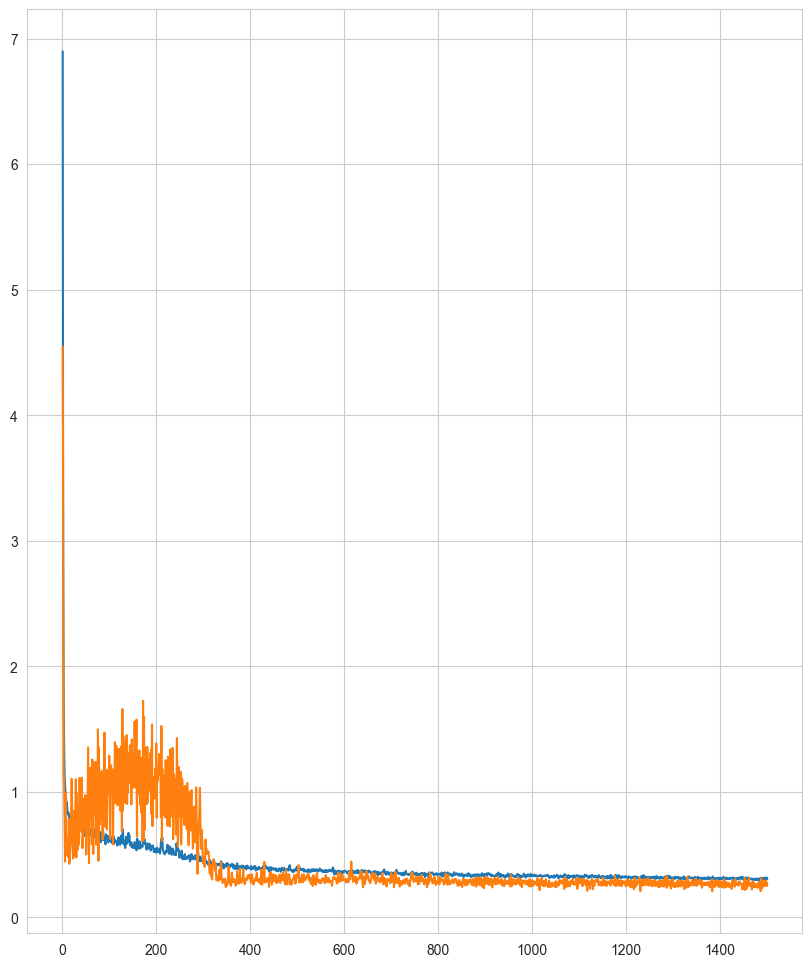

In [92]:
epochs = 1500
history = model.fit(x=data_num_train.drop("SalePrice", axis=1), y=data_num_train["SalePrice"],
                    validation_data=(data_num_test.drop("SalePrice", axis=1), data_num_test["SalePrice"]),
                    epochs=epochs, batch_size=256)
plt.plot(range(1, epochs + 1), history.history['loss'], label="loss")
plt.plot(range(1, epochs + 1), history.history['val_loss'], label="val_loss")
plt.show()

0.01148088764181016


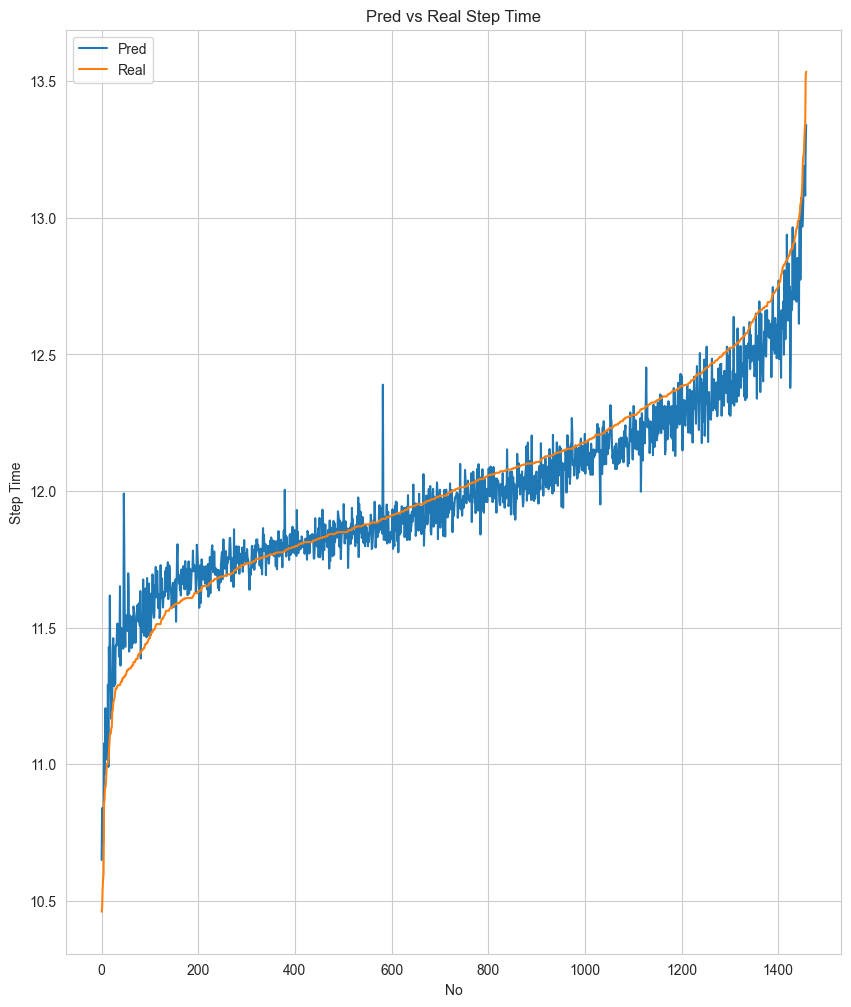

0.11356561044806451


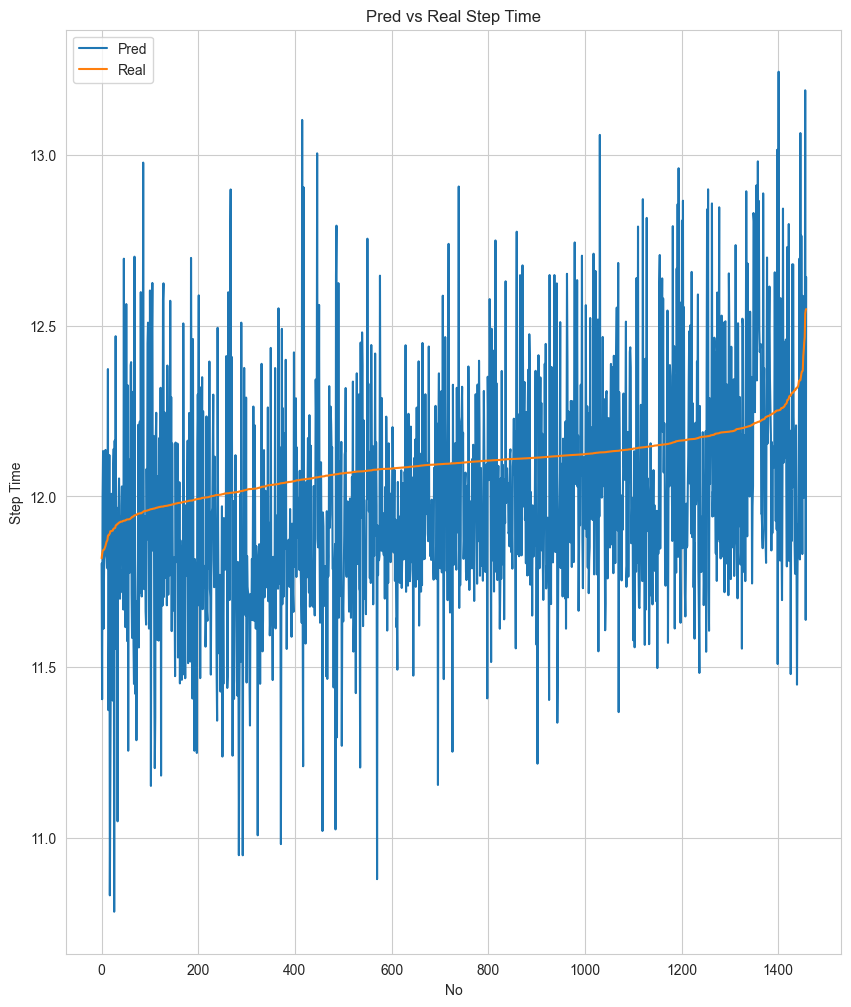

In [93]:
train_pred = model.predict(data_num_train.drop('SalePrice', axis=1), verbose=0)
rmse_train = mean_squared_error(data_num_train['SalePrice'], train_pred, )
print(rmse_train)

draw_pred_lines(list(train_pred), data_num_train['SalePrice'].to_list())



test_pred = model.predict(data_num_test.drop('SalePrice', axis=1), verbose=0)
rmse_test = mean_squared_error(data_num_test['SalePrice'], test_pred, )
print(rmse_test)

draw_pred_lines(list(test_pred), data_num_test['SalePrice'].to_list())